*This jupyter notebook is part of Arizona State University's course CAS 503 (Fundamentals of Complex Systems Science: Collectives) and was written by Bryan Daniels.  It was last updated March 20, 2024.*

*Data used in this notebook comes from the following publication:*
* *McPherson, E. Gregory; van Doorn, Natalie S.; Peper, Paula J. 2016. Urban tree database. Fort Collins, CO: Forest Service Research Data Archive. Updated 21 January 2020. https://doi.org/10.2737/RDS-2016-0005*

# Identifying scaling laws

In lecture, we saw how scaling laws can often be used to relate quantities in collectives to one another.  A common basic type of scaling takes the form of a "self-similar" power law:
$$
A = k B^\beta,
$$
where $A$ and $B$ are two quantities of interest, $k$ is a constant factor, and $\beta$ is the exponent of the power law.

In this exercise, we'll look for scaling laws within some real-world ecological data from measurements of trees.

First import some useful standard python packages:

In [2]:
import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18}) # increases font size on plots
import pandas
from pathlib import Path # to handle file paths across all operating systems

`numpy` (Numerical Python) is very useful for working with arrays of numbers; we'll use `matplotlib` to make plots; and `pandas` is a powerful package for managing data—think of it as a grown-up version of an Excel spreadsheet.

Now we'll use `pandas` to load in some public tree data from a CSV file provided by the Forest Service's "Urban Tree Database":

*(Hint: Are you getting a `FileNotFoundError` when running the following line?  If so, be sure that you have downloaded the GitHub repository in its entirety before trying to run this notebook.  See the [instructions here](https://github.com/bcdaniels/CAS-503-Collectives#setting-up-this-git-repository) for more information.)*

In [3]:
data = pandas.read_csv(Path('data/McPhersonEtAl2020/TS3_Raw_tree_data.csv'))

What is this `data` object?

In [4]:
type(data)

pandas.core.frame.DataFrame

It's a `pandas` `DataFrame` object, basically a spreadsheet of data values.  To see a preview of the data, use the `head` function:

In [5]:
data.head()

,DbaseID,Region,City,Source,TreeID,Zone,Park/Street,SpCode,ScientificName,CommonName,...,Shape,WireConf,dbh1,dbh2,dbh3,dbh4,dbh5,dbh6,dbh7,dbh8
0,1,InlVal,"Modesto, CA",Motown2.xls: Completed Data,1,Nursery,Nursery,ACSA1,Acer saccharinum,Silver maple,...,-1,-1,2.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2,InlVal,"Modesto, CA",Motown2.xls: Completed Data,2,Nursery,Nursery,BEPE,Betula pendula,European white birch,...,-1,-1,2.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,3,InlVal,"Modesto, CA",Motown2.xls: Completed Data,3,Nursery,Nursery,CESI4,Celtis sinensis,Chinese hackberry,...,-1,-1,2.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,4,InlVal,"Modesto, CA",Motown2.xls: Completed Data,4,Nursery,Nursery,CICA,Cinnamomum camphora,Camphor tree,...,-1,-1,2.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,5,InlVal,"Modesto, CA",Motown2.xls: Completed Data,5,Nursery,Nursery,FRAN_R,Fraxinus angustifolia 'Raywood',Raywood ash,...,-1,-1,2.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Each row corresponds to a single tree.  How many trees do we have?

In [6]:
len(data)

14487

A lot of trees!  We can also see a list of all the column names:

In [7]:
data.columns

Index(['DbaseID', 'Region', 'City', 'Source', 'TreeID', 'Zone', 'Park/Street',
       'SpCode', 'ScientificName', 'CommonName', 'TreeType', 'address',
       'street', 'side', 'cell', 'OnStreet', 'FromStreet', 'ToStreet', 'Age',
       'DBH (cm)', 'TreeHt (m)', 'CrnBase', 'CrnHt (m)', 'CdiaPar (m)',
       'CDiaPerp (m)', 'AvgCdia (m)', 'Leaf (m2)', 'Setback', 'TreeOr',
       'CarShade', 'LandUse', 'Shape', 'WireConf', 'dbh1', 'dbh2', 'dbh3',
       'dbh4', 'dbh5', 'dbh6', 'dbh7', 'dbh8'],
      dtype='object')

Now we'll use the following syntax to look at a subset of the data coming from a single species, the [Japanese zelkova](https://en.wikipedia.org/wiki/Zelkova_serrata):

In [8]:
dataSubset = data[ (data['CommonName']=='Japanese zelkova') ]

And we can, for instance, look at the cities and tree heights for the 112 Japanese zelkova in the database:

In [9]:
dataSubset[['City','TreeHt (m)']]

,City,TreeHt (m)
21,"Modesto, CA",2.0
58,"Modesto, CA",9.0
111,"Modesto, CA",5.0
157,"Modesto, CA",12.0
172,"Modesto, CA",11.5
...,...,...
14482,"Sacramento, CA",26.0
14483,"Sacramento, CA",25.0
14484,"Sacramento, CA",29.0
14485,"Sacramento, CA",22.0


Another common measurement for those who study trees is the "diameter at breast height" (DBH).  This measures the diameter of a tree's trunk at a fixed distance from the ground.

❓**Naively (or not so naively, if you are a tree biologist), how would you expect the height of a tree to scale with the diameter of its trunk?  Or would you expect any kind of scaling relationship at all?** *Hint: There's no wrong answer here—we're just practicing the good scientific habit of guessing what the answer will be before you calculate it.*

✳️ **Answer:** 

Now let's check the data.

The function `plt.scatter` will take two columns of our dataset and plot points in a 2D scatter plot:

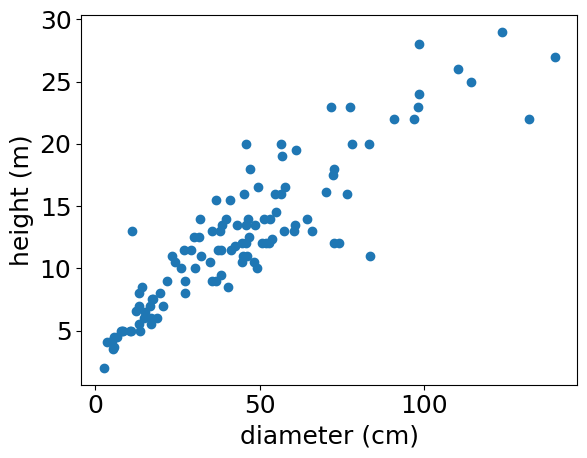

In [10]:
# load data
data = pandas.read_csv(Path('data/McPhersonEtAl2020/TS3_Raw_tree_data.csv'))
dataSubset = data[ (data['CommonName']=='Japanese zelkova') ]

# make scatter plot
plt.scatter(dataSubset['DBH (cm)'],dataSubset['TreeHt (m)'])
plt.xlabel('diameter (cm)')
plt.ylabel('height (m)');

There is definitely some kind of relationship.  Maybe linear?  Maybe there is a curve?  Recall that, in lecture, we saw how a log-log plot will show a power law relationship as a straight line.  

❓**Plot the same data on a log-log plot.**  *Hints: `numpy.log` will take the logarithm of each value in an array of data: e.g. `numpy.log(dataSubset['DBH (cm)'])`.  Don't forget axes labels!*

In [11]:
# ✳️ Answer

This looks quite linear, indicating that tree height does scale (at least roughly) as a power law of diameter.

Recall that the slope of a line on a log-log plot indicates the power of the power law: taking the logarithm of both sides of the equation at the beginning of the notebook, we have
$$
\log A = \log k + \beta \log B,
$$
so the exponent $\beta$ in the original equation is the slope of a linear relationship between $\log A$ and $\log B$.

So we will now fit a line to our logged data, making use of a polynomial fitting function from `numpy` (a polynomial of degree 1 is a line):

In [12]:
polyfit = numpy.polynomial.Polynomial.fit(numpy.log(dataSubset['DBH (cm)']),
                                          numpy.log(dataSubset['TreeHt (m)']),1).convert()
polyfit

Polynomial([0.3909602 , 0.57335587], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

This output means that the logarithm of tree height is approximately 0.39 plus 0.57 times the logarithm of DBH.

We can plot the fit line using the following code:

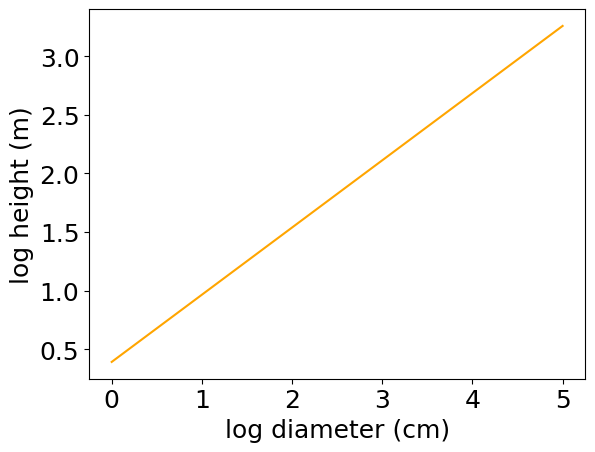

In [13]:
logDiameters = numpy.linspace(0,5)
predictedLogHeights = 0.39096 + 0.57336*logDiameters
plt.plot(logDiameters,predictedLogHeights,color='orange')
plt.xlabel('log diameter (cm)')
plt.ylabel('log height (m)');

❓**Combine your scatter plot of the logged data above with the fit line to display them overlapping on the same plot.** *Hint: You can typically make overlapping plots simply by calling plotting functions one after another.*

In [14]:
# ✳️ Answer

❓**What is the numerical value for our estimate of the exponent $\beta$, which describes the scaling of tree height with diameter? Is the scaling linear, superlinear, or sublinear?**

✳️ **Answer:** 

❓**On the original, non-logged scatter plot, if we overlay the fit scaling law, should it curve upward as diameter increases (with a positive slope that increases), curve downward (with a positive slope that decreases), or appear as a straight line (with a constant positive slope)?**

✳️ **Answer:** 

Check your answer with the following code that adds the power law fit to the original scatter plot:

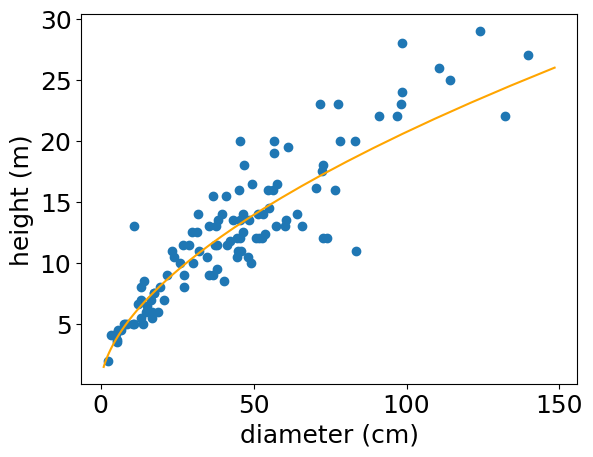

In [15]:
# load data
data = pandas.read_csv(Path('data/McPhersonEtAl2020/TS3_Raw_tree_data.csv'))
dataSubset = data[ (data['CommonName']=='Japanese zelkova') ]

# make scatter plot
plt.scatter(dataSubset['DBH (cm)'],
            dataSubset['TreeHt (m)'])

# compute predicted heights
logDiameters = numpy.linspace(0,5)
diameters = numpy.exp(logDiameters)
predictedLogHeights = 0.39096 + 0.57336*logDiameters
predictedHeights = numpy.exp(predictedLogHeights)

# plot both data and predicted heights
plt.plot(diameters,predictedHeights,color='orange')
plt.xlabel('diameter (cm)')
plt.ylabel('height (m)');

❓**Extrapolate using your fit scaling law to predict the height of a hypothetical Japanese zelkova that has a trunk 200 cm in diameter.**

✳️ **Answer:** 

⚛️ **Bonus question (for nothing but bragging rights):** An important quantity for ecologists is the bio-mass, basically the total mass of the wood in our tree example (which is related, for example, to the total amount of carbon captured by a forest).  The bio-mass of a tree is harder to measure than, say, its diameter.  Use your scaling law and any needed basic assumptions to predict how a Japanese zelkova's biomass scales as a function of its diameter.  This relates our scaling analysis with ecologically relevant collective effects of the cells that combine to form a tree.

✴️ **Answer:** 